# Jupyter Notebook - Projet Banklytics
Ce projet s‚Äôappuie sur la m√©thodologie CRISP-ML, une adaptation moderne du standard CRISP-DM, sp√©cifiquement con√ßue pour encadrer les projets de machine learning d√©ploy√©s en environnement r√©el. Cette approche int√®gre non seulement les √©tapes classiques de compr√©hension m√©tier, de pr√©paration des donn√©es, de mod√©lisation et d‚Äô√©valuation, mais elle met √©galement l‚Äôaccent sur les dimensions op√©rationnelles essentielles telles que le d√©ploiement, le monitoring et la gouvernance du mod√®le. √Ä chaque √©tape, les exigences m√©tier, techniques et r√©glementaires ont √©t√© prises en compte. Le pipeline de traitement a √©t√© industrialis√© √† l‚Äôaide de Scikit-Learn, et l‚Äôoptimisation des hyperparam√®tres a √©t√© confi√©e √† Optuna afin d'assurer la robustesse et la performance du mod√®le en production. En int√©grant les principes de CRISP-ML, ce projet garantit une solution align√©e avec les bonnes pratiques de l‚Äôindustrie, adapt√©e aux contraintes du secteur bancaire et pens√©e pour un d√©ploiement durable et responsable.

## 1. Phase d‚Äôid√©ation : Business & Data Understanding

### Contexte m√©tier
Banklytics est une banque nord-am√©ricaine active sur le march√© des pr√™ts hypoth√©caires. Dans un contexte de digitalisation croissante des services financiers, l‚Äôinstitution souhaite renforcer la rigueur de son processus d‚Äô√©valuation immobili√®re. Actuellement, l‚Äôestimation de la valeur d‚Äôun bien propos√© en garantie repose en partie sur le prix de vente d√©clar√© par l‚Äôemprunteur et sur une expertise humaine, ce qui peut induire des biais ou des erreurs. Une surestimation expose la banque √† un risque financier en cas de d√©faut, tandis qu‚Äôune sous-estimation peut nuire √† l‚Äôexp√©rience client et faire perdre des opportunit√©s commerciales.

### Objectif du projet
Le projet vise √† d√©velopper un mod√®le de r√©gression supervis√©e permettant de pr√©dire, √† partir des caract√©ristiques objectives du bien, sa valeur de march√© estim√©e. L‚Äôoutil servira de r√©f√©rence neutre et reproductible pour les analystes d‚Äôoctroi de cr√©dit, dans le but de :

- Renforcer l‚Äôobjectivit√© des d√©cisions ;
- R√©duire les √©carts entre analystes ;
- D√©tecter plus rapidement les anomalies ;
- Acc√©l√©rer le traitement des demandes standards.

Le mod√®le ne sera pas utilis√© pour automatiser la d√©cision, mais pour outiller l‚Äôexpert humain.

### Origine et nature des donn√©es
Les donn√©es utilis√©es dans ce projet seront issues principalement des dossiers techniques de pr√™ts hypoth√©caires d√©j√† trait√©s par Banklytics. Chaque dossier contiendra des informations structur√©es sur les biens immobiliers financ√©s, telles que la surface habitable, le nombre de pi√®ces, l‚Äôann√©e de construction, l‚Äô√©tat g√©n√©ral, ou encore la pr√©sence d‚Äôannexes (garage, sous-sol, etc.), ainsi que la valeur d‚Äôexpertise certifi√©e au moment de l‚Äôoctroi du cr√©dit.

Ces donn√©es internes seront nettoy√©es, anonymis√©es et consolid√©es afin de garantir la conformit√© aux exigences r√©glementaires (notamment en mati√®re de protection des donn√©es personnelles) et de constituer un jeu d‚Äôapprentissage statistiquement fiable. Ce jeu sera ensuite enrichi par des donn√©es publiques ouvertes, telles que les registres cadastraux, les caract√©ristiques du quartier ou encore des indicateurs socio-√©conomiques (revenu m√©dian, densit√© de population), issus de sources officielles fiables.

L‚Äôensemble constituera une base de donn√©es propri√©taire de haute qualit√©, repr√©sentative du march√© cible nord-am√©ricain. Cette approche permettra √† la banque de disposer d‚Äôun socle de donn√©es robuste, l√©galement exploitable, et directement pertinent pour entra√Æner un mod√®le d‚Äôestimation fiable de la valeur immobili√®re.

### Crit√®res de succ√®s m√©tier
Le projet est consid√©r√© comme r√©ussi si :

- R√©duction de 15‚ÄØ% des dossiers n√©cessitant une r√©√©valuation manuelle en raison d‚Äôun √©cart trop important entre la valeur d√©clar√©e et la valeur estim√©e.
- Diminution du d√©lai moyen de traitement des dossiers standards, avec un objectif de r√©duction de 20‚ÄØ% du temps d‚Äôanalyse pour les cas non probl√©matiques.
- Taux d‚Äôadoption de l‚Äôoutil d‚Äôau moins 90‚ÄØ% par les analystes cr√©dit dans les 6 mois suivant son d√©ploiement.
- Am√©lioration de la transparence vis-√†-vis des clients, via la capacit√© √† justifier de mani√®re claire et structur√©e les estimations immobili√®res produites par le mod√®le (tra√ßabilit√© explicable).
- Augmentation du taux de satisfaction client mesur√© par enqu√™te post-octroi sur la clart√© et la compr√©hension de la proc√©dure d‚Äô√©valuation.
- R√©duction des pr√™ts √† risques et des pertes en cas de mauvais payeur

### Crit√®re de succ√®s techniques
Le Root Mean Squared Logarithmic Error (RMSLE) a √©t√© choisi comme unique indicateur de performance du mod√®le. Cette m√©trique pr√©sente plusieurs avantages particuli√®rement adapt√©s au contexte de l‚Äô√©valuation de biens immobiliers dans le cadre de l‚Äôoctroi de cr√©dits hypoth√©caires.

Premi√®rement, le RMSLE √©value l‚Äôerreur relative entre la valeur pr√©dite et la valeur r√©elle, ce qui est essentiel dans un domaine o√π les montants peuvent varier fortement d‚Äôun bien √† l‚Äôautre. Une erreur de CHF 50'000 n‚Äôa pas le m√™me poids si le bien est estim√© √† CHF 200‚Äô000 ou √† CHF 1'500‚Äô000. Le RMSLE permet donc d‚Äôappr√©cier les √©carts de mani√®re proportionnelle.

Deuxi√®mement, la transformation logarithmique int√©gr√©e dans cette m√©trique r√©duit l‚Äôinfluence des outliers, en att√©nuant l‚Äôimpact des valeurs extr√™mes qui peuvent d√©s√©quilibrer les mod√®les traditionnels bas√©s sur la RMSE.

Enfin, le RMSLE p√©nalise davantage les sous-estimations, ce qui est align√© avec une logique de prudence bancaire. Il est en effet pr√©f√©rable de sous-estimer l√©g√®rement la valeur d‚Äôun bien (ce qui limite le montant du pr√™t) que de le sur√©valuer, ce qui exposerait la banque √† un risque de perte en cas de d√©faut.

Afin de valider un mod√®le techniquement, nous estimons que le RMSLE devrait √™tre inf√©rieur d'au moins 0.03 par rapport au score de la baseline que nous aurons identifi√©. L'investissement dans un mod√®le plus complexe que notre mod√®le baseline ne pourra pas √™tre justifi√© le cas √©ch√©ant.

### Qualit√© des donn√©es et risques identifi√©s
L‚Äôanalyse exploratoire a permis d‚Äôidentifier plusieurs enjeux de qualit√© :

Donn√©es manquantes sur certaines variables (ex. : surface du garage, ann√©e de r√©novation) ;

Pr√©sence d‚Äôoutliers extr√™mes (ex. : biens de luxe) pouvant fausser la r√©gression classique ;

Variables tr√®s asym√©triques comme SalePrice, justifiant une transformation logarithmique pour la cible ;

Des techniques adapt√©es ont √©t√© int√©gr√©es au pipeline de traitement : imputation par m√©diane, transformation log1p, encodage One-Hot pour les variables cat√©gorielles.

Variables cl√©s identifi√©es
L‚Äôanalyse exploratoire des corr√©lations et de la variance expliqu√©e a permis de d√©gager les variables suivantes comme les plus pr√©dictives :

GrLivArea (surface habitable en pieds carr√©s)

OverallQual (qualit√© g√©n√©rale per√ßue du bien)

YearBuilt (ann√©e de construction)

GarageArea (surface du garage)

Neighborhood (quartier)

Configuration de l'environnement et des diff√©rents imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import skew
from scipy.special import boxcox1p

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge


import xgboost as xgb
import optuna

import mlflow
from mlflow.models import infer_signature
import joblib

import shap

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

Fonctions utilis√©es

In [4]:
# Display missing values
def plot_missing(data):

    missing = data.isnull().sum()
    missing = missing[missing > 0]
    
    if missing.empty:
        print('No missing values')
    else :
        missing.sort_values(inplace=True)
        missing.plot.bar()
    
        plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

def rmse(actual, predicted) :
    return np.sqrt(mean_squared_error(actual, predicted))

## 1. Phase d'Id√©ation : Compr√©hension du Contexte et des Donn√©es

In [7]:
# 1.1 Chargement des donn√©es
try:
    train_df = pd.read_csv('train.csv', index_col = 'Id')
    test_df = pd.read_csv('test.csv', index_col = 'Id')
    print(f"Donn√©es d'entra√Ænement charg√©es : {train_df.shape}")
    print(f"Donn√©es de test charg√©es : {test_df.shape}")
except FileNotFoundError:
    print("Erreur : Assurez-vous que les fichiers 'train.csv' et 'test.csv' sont pr√©sents.")
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()


Donn√©es d'entra√Ænement charg√©es : (1460, 80)
Donn√©es de test charg√©es : (1459, 79)


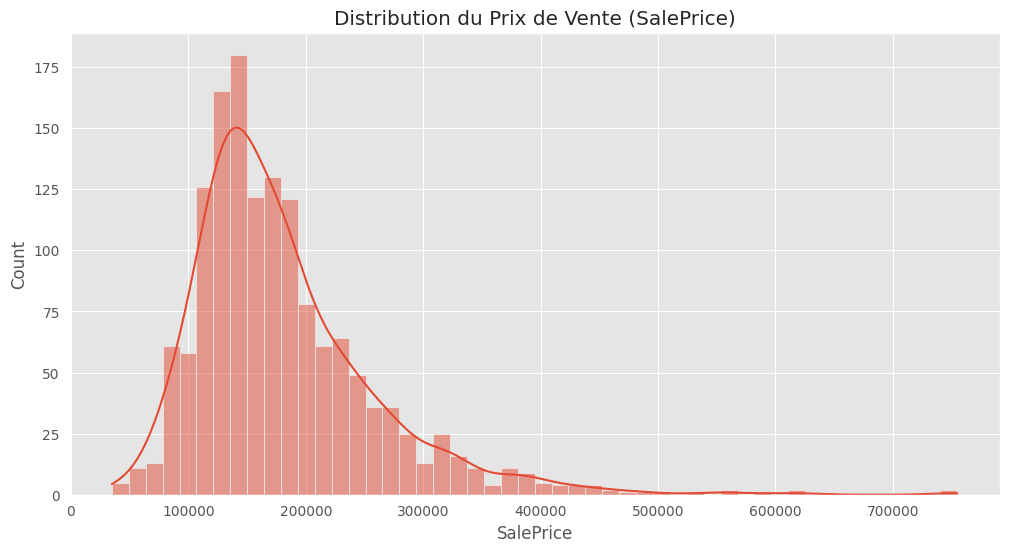

Asym√©trie (Skewness) du prix de vente : 1.88
La distribution est fortement asym√©trique √† droite, justifiant une transformation logarithmique.


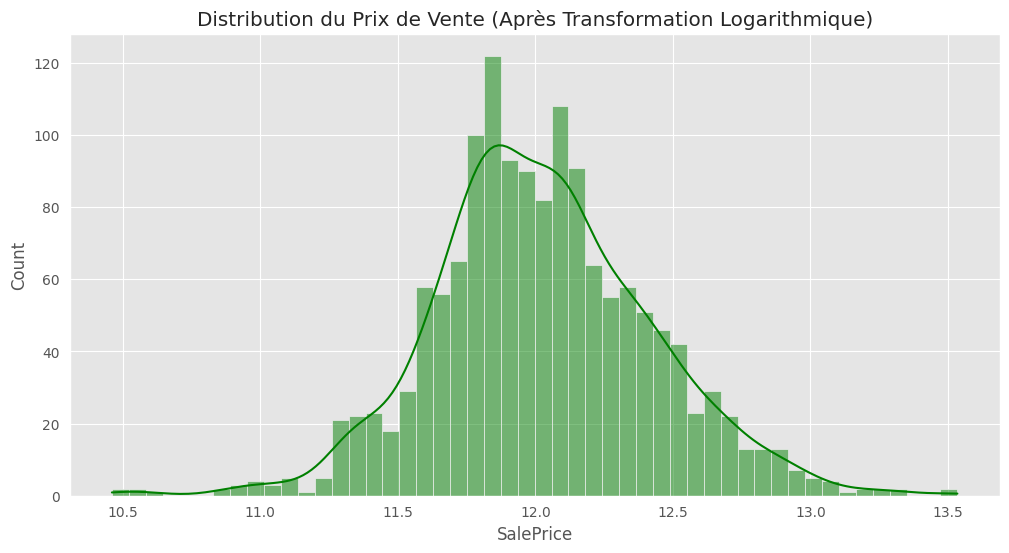

Asym√©trie apr√®s transformation : 0.12


In [8]:
# 1.2 Analyse Exploratoire des Donn√©es (EDA)
if 'SalePrice' in train_df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(train_df['SalePrice'], kde=True, bins=50)
    plt.title('Distribution du Prix de Vente (SalePrice)')
    plt.show()
    print(f"Asym√©trie (Skewness) du prix de vente : {train_df['SalePrice'].skew():.2f}")
    print("La distribution est fortement asym√©trique √† droite, justifiant une transformation logarithmique.")

    target = np.log1p(train_df["SalePrice"])

    plt.figure(figsize=(12, 6))
    sns.histplot(target, kde=True, bins=50, color='green')
    plt.title('Distribution du Prix de Vente (Apr√®s Transformation Logarithmique)')
    plt.show()
    print(f"Asym√©trie apr√®s transformation : {target.skew():.2f}")

Nous allons donc toujours travailler avec notre target qui est le log(SalePrice). C'est pourquoi nous effectuerons nos comparaisons en RMSE afin de ne pas avoir de redondance avec le log d√©j√† pr√©sent dans la target.

Il convient maintenant de nous int√©resser de plus pr√®s aux donn√©es que nous avons √† disposition afin de cr√©er nos mod√®les. Nous allons dans un premier temps les diviser en trois cat√©gories :
- Les donn√©es qualitatives
- Les donn√©es quantitatives
- Les dates



In [9]:
qualitative = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
              'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
              'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
              'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
              'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 
              'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
              'SaleType', 'SaleCondition', 'MoSold']

quantitative = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',  
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
               'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
               'PoolArea', 'MiscVal']

date = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']

Une fois la cat√©gorisation effectu√©e, nous avons control√© la qualit√© du dataset sur lequel nous allons entrainer nos mod√®les et certaines donn√©es sont manquantes ou alors non utilisables en l'√©tat. Nous devons alors les nettoyer et les rendre utilisables par nos mod√®les. Afin de garder une coh√©rence, nous allons concat√©ner les donn√©es d'entrainements ainsi que les donn√©es de test pour √™tre sur de traiter les donn√©es de la m√™me mani√®re.

Faisons dans un premier temps l'√©tat des lieux des diff√©rentes valeurs que l'on pourrait qualifier de manquantes.

In [10]:
data_df = pd.concat([train_df, test_df])

Nombre de donn√©es quantitatives manquantes


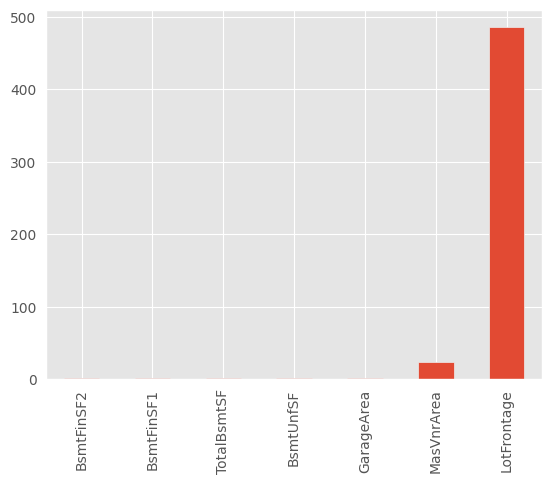

In [11]:
print(f"Nombre de donn√©es quantitatives manquantes")
plot_missing(data_df[quantitative])

Nombre de donn√©es qualitatives manquantes


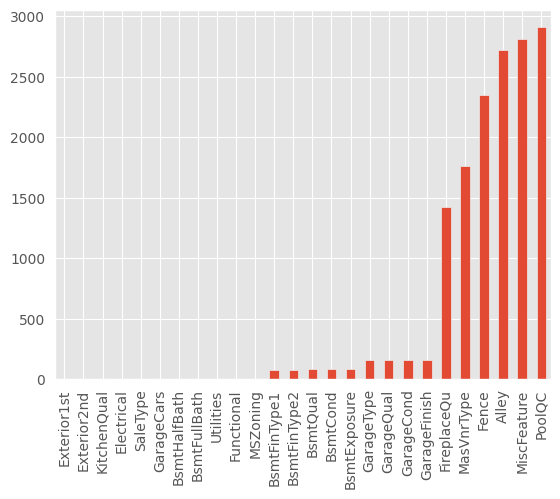

In [12]:
print(f"Nombre de donn√©es qualitatives manquantes")
plot_missing(data_df[qualitative])

Nombre de donn√©es dates manquantes


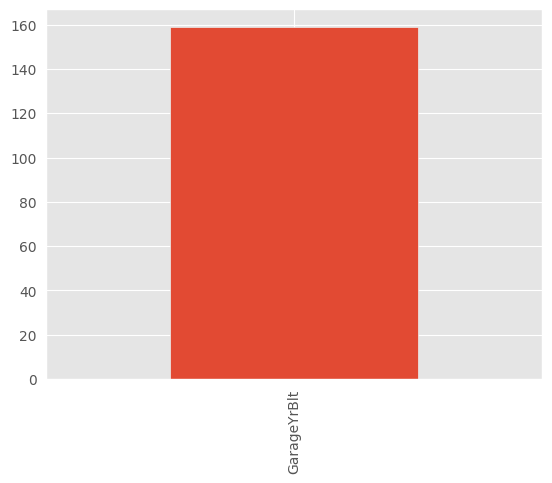

In [13]:
print(f"Nombre de donn√©es dates manquantes")
plot_missing(data_df[date])

Nous ne pouvons pas laisser ces donn√©es comme √ßa car elles seront inexploitable par le mod√®le. Par cons√©quent, en fonction du type de donn√©es nous allons devoir interpreter ce cela veut signifer. Par exemple, en ce qui concerne la donn√©e LotFrontage, NA signifie qu'il n'y a pas de rue coll√©e √† la propri√©t√©. Comme LotFrontage est une valeur quantitative, nous pouvons alors remplac√© ce NA par 0 ce qui permettra au mod√®le de comprendre la donn√©e sans pour autant perdre l'information qu'elle repr√©sente.  
  
Certaines valeurs qualitatives comme GarageType ont √©galement des donn√©es manquantes not√©es NA dans notre dataset cependant nous devons les traiter diff√©remment puisqu'il s'agit de donn√©es qualitative. Nous avons d√©cider de laisser NA pour toutes les donn√©es qualitatives et nous savons que cette notation n'indique pas l'absence de donn√©es (null) mais bien une information qui a √©t√© recens√©e.  
  
Concernant les colonnes de types date, seul GarageYrBlt contient des valeurs NA. Afin d'unifier cette donn√©e, nous avons d√©cid√© de remplacer par le valeur de l'ann√©e de construction

In [15]:
# Function to fill missing data with a constant value
def fill_missing_with_constant(data, columns, constant):
    
    data_clean = data.copy()
    
    for c in columns :
        
        if data_clean[c].isnull().any():
            data_clean[c] = data_clean[c].fillna(constant)
    
    return data_clean

In [16]:
def fill_missing_with_column(data, missing, column) :
    
    data_clean = data.copy()
    
    data_clean[missing] = np.where(data_clean[missing].isnull(), data_clean[column], data_clean[missing])
    
    return data_clean

Etant donn√© l'√©cart des ann√©es de ventes dans notre dataset, il nous faut convertir les diff√©rentes colonnes de dates (`YearBuilt`, `YearRemodAdd`, et `GarageYrBlt`) en dur√©e afin d'unifier les dur√©es entre l'ann√©e de vente et les diff√©rentes dates.

In [17]:
def compute_differences_to_year_sold(data) :
    
    data_clean = data.copy()
    
    data_clean['YearBuilt'] = data_clean['YrSold'] - data_clean['YearBuilt']
    data_clean['YearRemodAdd'] = data_clean['YrSold'] - data_clean['YearRemodAdd']
    data_clean['GarageYrBlt'] = data_clean['YrSold'] - data_clean['GarageYrBlt']
    
    return data_clean

In [18]:
def clean(data) :
    
    data_clean = data.copy()
    
    # imputing missing variables
    data_clean = fill_missing_with_constant(data_clean, columns = quantitative, constant = 0)
    data_clean = fill_missing_with_constant(data_clean, columns = qualitative, constant = 'NA')
    data_clean = fill_missing_with_column(data_clean, missing = ['GarageYrBlt'], column = ['YearBuilt'])

    # transform date columns
    data_clean = compute_differences_to_year_sold(data_clean)
    
    return data_clean

In [19]:
data_clean_df = clean(data_df)
train_clean_df = clean(train_df)
test_clean_df = clean(test_df)

## Mod√®le Baseline et choix des variables pour ce dernier  

Afin de pouvoir cr√©er un mod√®le Baseline simple, nous devons s√©l√©ctionner les variables qui vont √™tre le plus correl√©es avec le logarithme du prix de vente.  
  
Pour se faire, nous devons encoder les variables qualitatives en variable num√©riques afin de calculer leur corr√©lation. Une solution √† ce probl√®me serait de remplacer la variable par la moyenne de la variable cible associ√©e. Ceci entrainera donc une correlation entre la variable qualitative et la nouvelle variable cr√©√©e.

In [20]:
def encode_with_mean(data, target, features):
    
    data_preprocess = data.copy()
    
    for f in features: 
        
        # create a temporary dataframe for our workload
        frame = pd.DataFrame()
        frame[f] = data[f].copy()
        frame[target.name] = target.copy()
        
        # create the mapping table
        mapping = pd.DataFrame()
        mapping['val'] = data[f].unique()
        mapping.index = mapping.val
        
        # compute the mean of our target variable for each category
        mapping['mean'] = frame[[f, target.name]].groupby(f).mean()[target.name]
        
        # if a category has NA, we shall simply put the mean value
        mapping['mean'] = mapping['mean'].fillna(target.mean())

        # we replace the feature with the means in the mapping table
        data_preprocess[f] = pd.merge(data_preprocess, mapping, left_on = f, right_index = True)['mean'].copy()
        
    return data_preprocess

In [21]:
#Function to calculate the correlation of Pearson between a target variable and features
def correlation(y, X, features, method = 'pearson'):
    
    cor = pd.DataFrame()
    cor['feature'] = features
    
    cor['correlation_coef'] = [X[f].corr(y, method = method) for f in features]
    cor['correlation_coef'] = cor['correlation_coef'].fillna(0)
    cor['correlation_coef_abs'] = cor['correlation_coef'].abs()
    
    cor = cor.sort_values('correlation_coef', ascending = False)

    plt.figure(figsize=(10, 0.25*len(features)))
    sns.barplot(data = cor, y = 'feature', x = 'correlation_coef', orient = 'h')
    
    return cor

feature  correlation_coef  correlation_coef_abs
56    OverallQual          0.817185              0.817185
9    Neighborhood          0.755518              0.755518
66      GrLivArea          0.700927              0.700927
44     GarageCars          0.700078              0.700078
19      ExterQual          0.679060              0.679060
..            ...               ...                   ...
65   LowQualFinSF         -0.037963              0.037963
70  EnclosedPorch         -0.149050              0.149050
76   YearRemodAdd         -0.568136              0.568136
78    GarageYrBlt         -0.569568              0.569568
75      YearBuilt         -0.587290              0.587290

[79 rows x 3 columns]

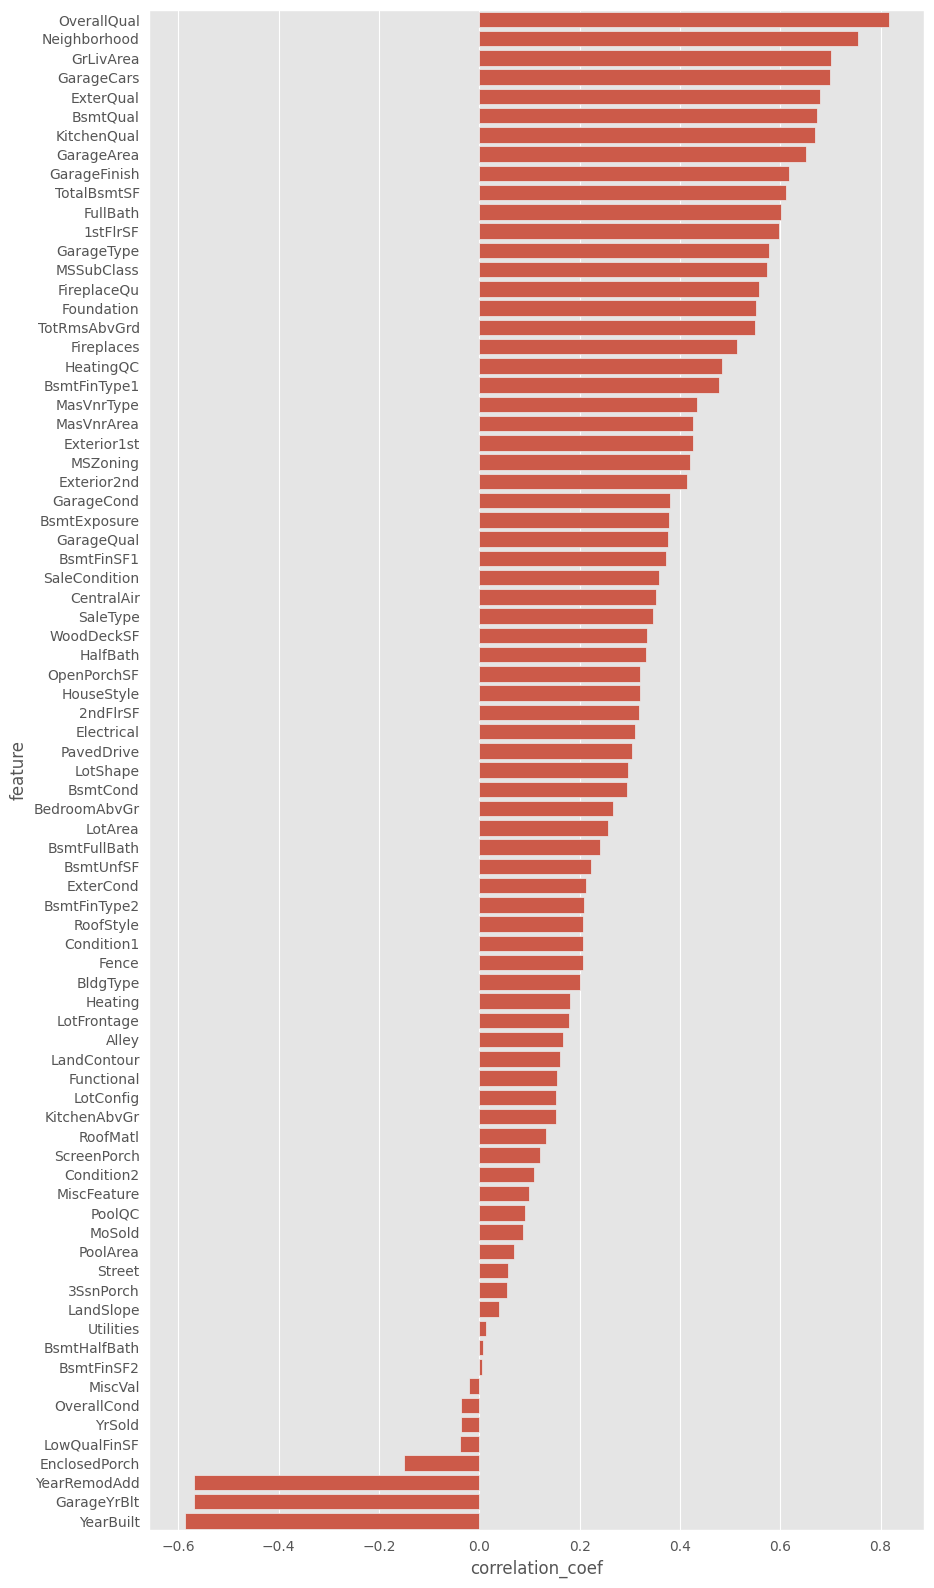

In [22]:
data_preprocess = encode_with_mean(data_clean_df, target, qualitative)

# Split of the clean dataset into train & validation
train_preprocess = data_preprocess[data_preprocess.index.isin(train_df.index)]
validation_preprocess = data_preprocess[data_preprocess.index.isin(test_df.index)]

cor = correlation(target, train_preprocess, qualitative + quantitative + date)
cor

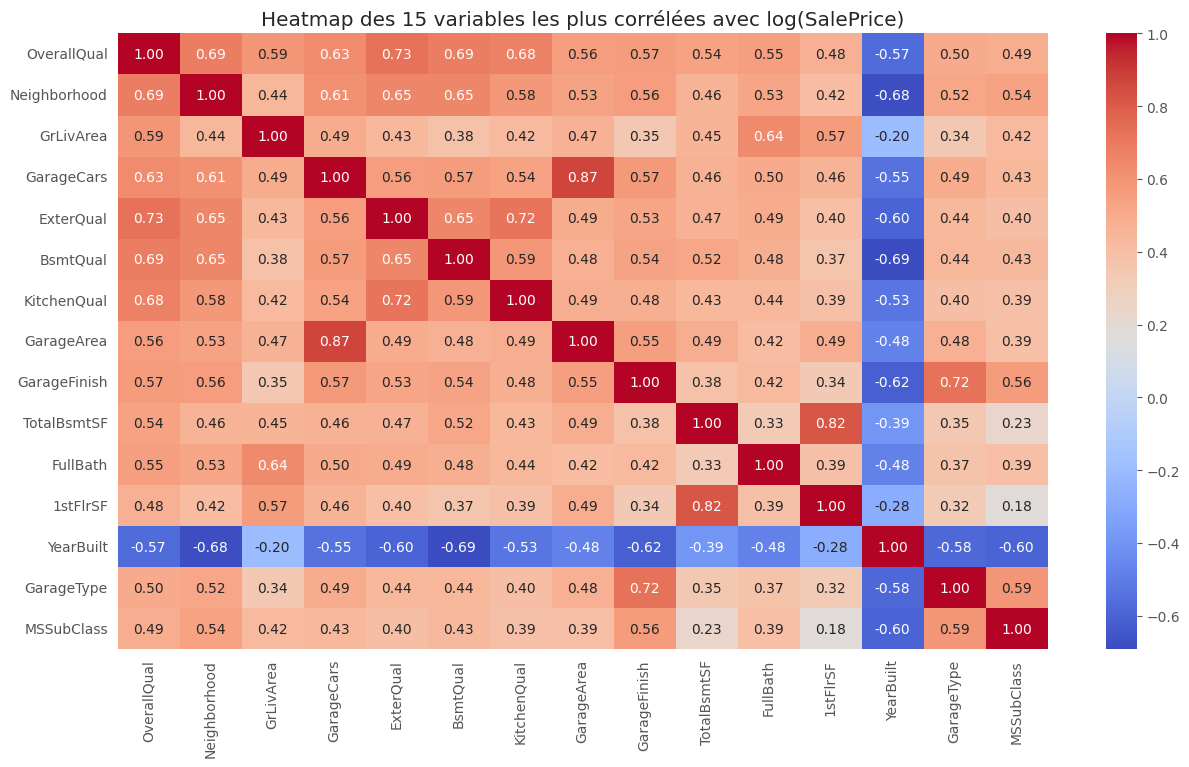

In [23]:
# S√©lectionne les 10 variables avec la plus forte corr√©lation absolue
top15 = cor.sort_values('correlation_coef_abs', ascending=False).head(15)['feature'].tolist()
# Sous-ensemble du DataFrame train_preprocess avec ces variables
df_top10 = train_preprocess[top15]

# Affiche la heatmap de corr√©lation
plt.figure(figsize=(15, 8))
sns.heatmap(df_top10.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des 15 variables les plus corr√©l√©es avec log(SalePrice)")
plt.show()

Nous allons donc s√©l√©ctionner cinq variables afin de cr√©er notre baseline. D'apr√®s les donn√©es de correlations ci-dessus ainsi que notre compr√©hension du m√©tier et du domaine immobilier, les variables suivantes ont retenues notre attention.  
- `OverallQual`, correlation de 0.82
- `Neighborhood`, correlation de 0.76
- `GrLivArea`, correlation de 0.70
- `TotalBsmtSF`, correlation de 0.61
- `YearBuilt`, correlation de -0.59

Ces variables sont assez communes lors de la recherche d'un logement et repr√©sentent plus ou moins les crit√®res de bases. En ce qui concerne la cave, il s'agit d'un point assez essentiel au vu de la situation g√©ographique de Ames car elle se situe en plein milieu du couloir des tornades (zone g√©ographique des √âtats-Unis fr√©quemment touch√©e par ce ph√©nom√®ne).
  
Notre baseline reposera donc sur ces cinq variables et nous appliqueronns la regr√©ssion lin√©aire afin de faire notre mod√®le.

In [24]:
base = ['OverallQual', 'Neighborhood', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']


X = train_preprocess[base]
x_test = validation_preprocess[base]
y = target


model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1367.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:03:21   Log-Likelihood:                 539.40
No. Observations:                1460   AIC:                            -1067.
Df Residuals:                    1454   BIC:                            -1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8392      0.271     25.244   

Voici les assomptions pour la r√©gression lin√©aire, en indiquant avec quel graphique nous allons les tester :
- Lin√©arit√© de la relation entre les variables explicatives et la variable cible -> Residuals vs Fitted
- Les r√©sultats sont normalements distribu√©s autour de 0 -> Normal Q-Q Plot
- Homosc√©dasticit√© des r√©sidus (variance constante) -> Scale-Location Plot
- Absence de points influents d√©mesur√©s -> Residuals vs Leverage
- Absence d'outliers dans les r√©sidus (erreurs extr√™mes) -> visible dans plusieurs graphes, notamment Q-Q Plot et Cook‚Äôs Distance

In [25]:
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
    """
    Function to reproduce the 4 base plots of an OLS model in R.

    ---
    Inputs:

    X: A numpy array or pandas dataframe of the features to use in building the linear regression model
    y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

    model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
    """

    if not model_fit:
        model_fit = sm.OLS(y, sm.add_constant(X)).fit()

    # create dataframe from X, y for easier plot handling
    dataframe = pd.concat([X, y], axis=1)
    
    # model values
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]
    
    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(x = model_fitted_y, y = dataframe.columns[-1], data = dataframe,
                                      lowess=True,
                                      scatter_kws={'alpha': 0.5},
                                      line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals')
    
    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_residuals[i]))
        
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals')
    
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                   xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                       model_norm_residuals[i]))
    
    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(x = model_fitted_y, y = model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')
    
    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_norm_residuals_abs_sqrt[i]))
    
    plot_lm_4 = plt.figure()
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(x = model_leverage, y = model_norm_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
    
    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                   xy=(model_leverage[i],
                                       model_norm_residuals[i]))
        
    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50),
          'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50)) # 1 line
    plot_lm_4.legend(loc='upper right')

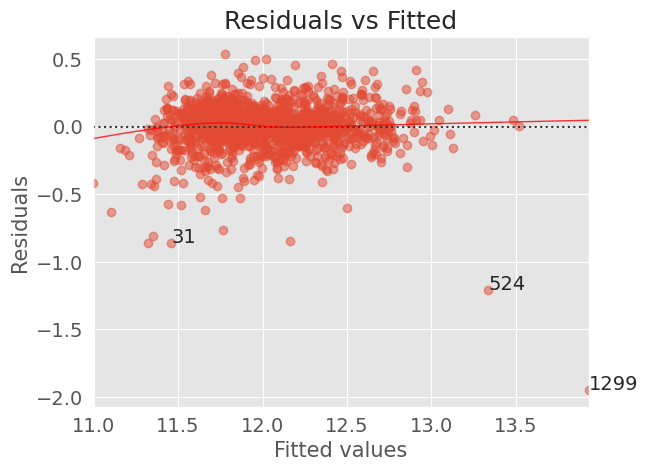

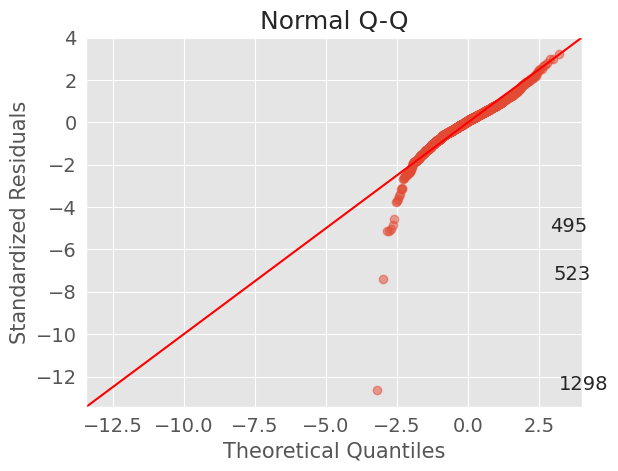

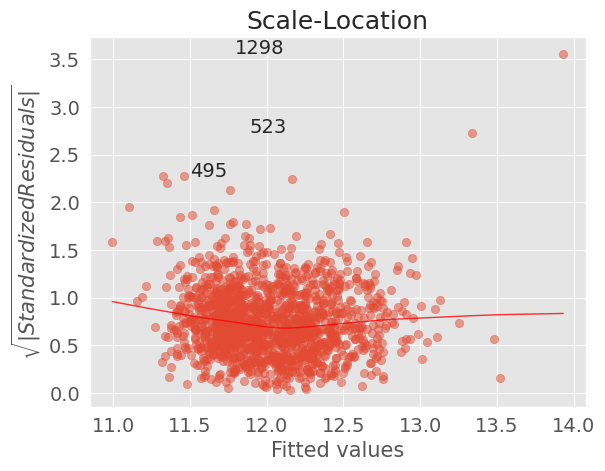

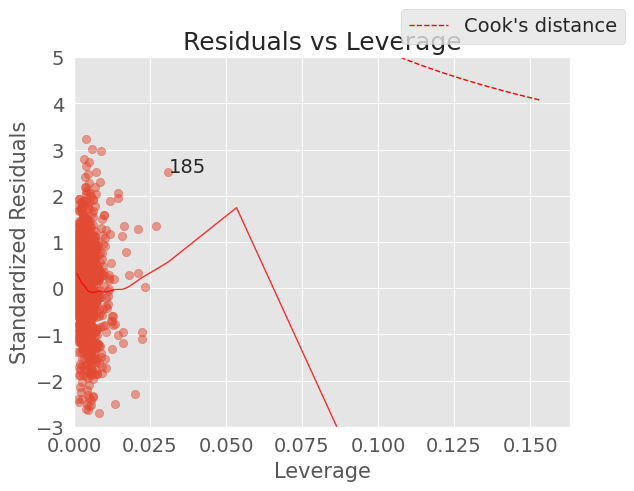

In [26]:
diagnostic_plots(sm.add_constant(X), y)

Nous voyons qu'il existe quelques valeurs extr√™mes que les graphes ci-dessus ont mis en lumi√®re. Il convient de les traiter afin qu'ils ne pejorent pas notre mod√®le. Un des crit√®res sur lequel se baser pour √©liminer une partie des ces valeurs extr√™mes est la taille de la maison. En effet, par convention, les biens ayant une superficie habitable de plus de 4000 pieds carr√© sont extr√™mement rares et ne sont pas repr√©sentatifs du march√©.

Nous supprimons donc ces donn√©es extr√™mes.

In [27]:
print(train_df[base].iloc[[31, 185, 495, 523, 524, 1298, 1299]])

      OverallQual Neighborhood  GrLivArea  TotalBsmtSF  YearBuilt
Id                                                               
32              5       Sawyer       1228         1228       1966
186            10      OldTown       3608         1107       1892
496             4       IDOTRR        720          720       1920
524            10      Edwards       4676         3138       2007
525             7      NoRidge       2398         1379       1996
1299           10      Edwards       5642         6110       2008
1300            5        NAmes       1246         1246       1959


In [28]:
def remove_outliers(data, target, feature):
    
    data_preprocess = data.copy()
    data_preprocess[target.name] = target.copy()
    
    #Compute interquartile range
    q1 = data_preprocess[feature].quantile(0.25)
    q3 = data_preprocess[feature].quantile(0.75)
    
    iqr = q3-q1 
    
    fence_low  = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    
    data_preprocess = data_preprocess.loc[(data_preprocess[feature] > fence_low) & (data_preprocess[feature] < fence_high)]
    
    return data_preprocess[data.columns], data_preprocess[target.name]

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1522.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:04:13   Log-Likelihood:                 659.93
No. Observations:                1429   AIC:                            -1308.
Df Residuals:                    1423   BIC:                            -1276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.7556      0.257     30.195   

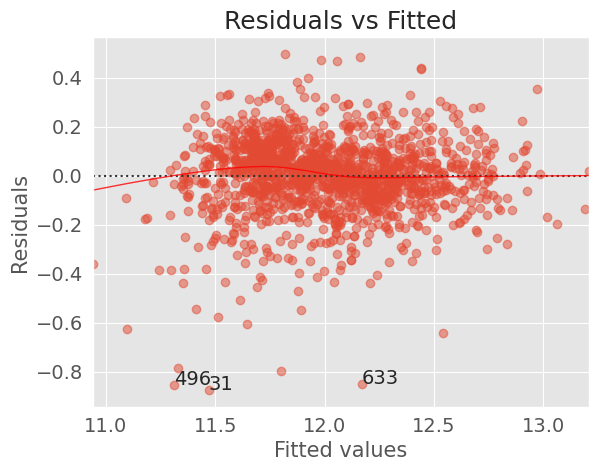

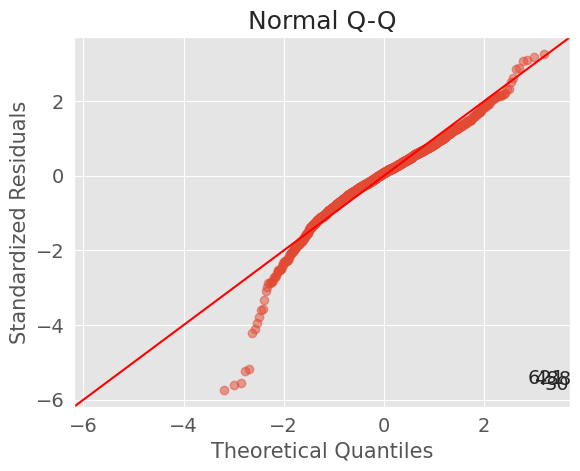

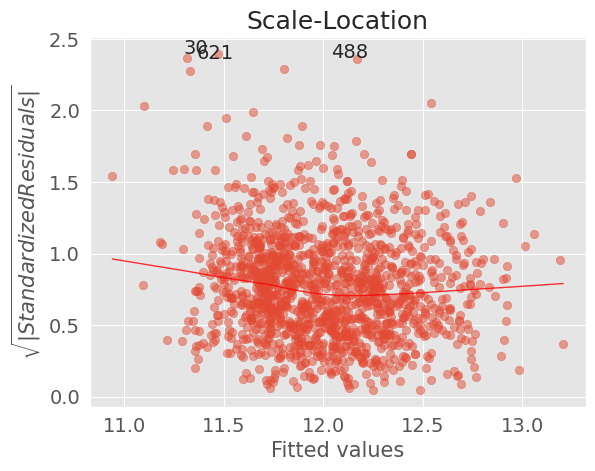

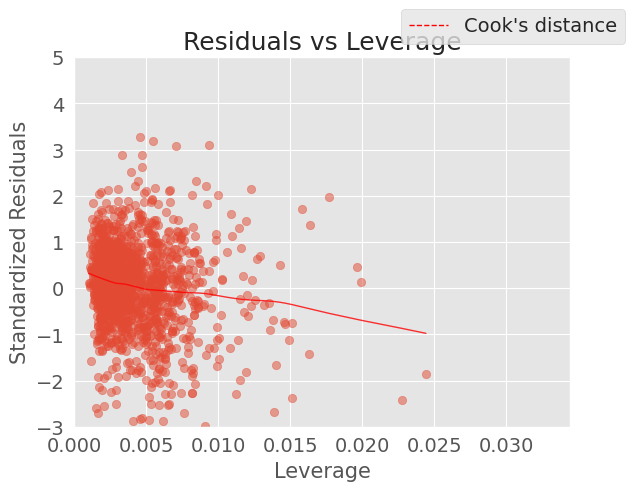

In [29]:
X, y = remove_outliers(X, y, feature = 'GrLivArea')

model = sm.OLS(y, sm.add_constant(X))
res = model.fit()

print(res.summary())

diagnostic_plots(sm.add_constant(X), y)

Notre mod√®le semble mieux se comporter sans ces valeurs extr√™mes. Il semble √™tre convaincant pour notre baseline. Nous allons donc calculer le RMSE bas√© sur notre target (le log de SalePrice)

In [30]:
y_pred = res.predict(sm.add_constant(X))
print(y_pred.head())

Id
1    12.214534
2    12.081588
3    12.244451
4    12.046219
5    12.620316
dtype: float64


In [31]:
baseline_RMSE = rmse(y, y_pred)
print('Root Mean Square Error (RMSE) :', baseline_RMSE)


Root Mean Square Error (RMSE) : 0.1524750806291098


In [32]:
y_pred_test = res.predict(sm.add_constant(x_test))

In [33]:
submission = pd.DataFrame()
submission['Id'] = y_pred_test.index
submission['SalePrice'] = np.expm1(y_pred_test.values)

submission.to_csv('Data/baselineV2.csv', index = False)

## 2. Phase de Design : Data & Model Engineering

In [34]:
# S√©paration des features (X) et de la cible (y)
if 'SalePrice' in train_df.columns:
    X = train_df.drop('SalePrice', axis=1)
    y = train_df['SalePrice']
    X_test = test_df.copy()

# Ing√©nierie des Features
all_data = pd.concat([X, X_test], axis=0)


X = all_data.iloc[:len(y)]
X_test = all_data.iloc[len(y):]

Afin de s'assurer que nos donn√©es puissent √™tre comprises et utilis√©es par notre mod√®le, il est primordial de cr√©er une pipeline capable d'effectuer les transformations n√©cessaires de mani√®res justes et syst√©matiques.  

Dans notre cas, nous avons identifi√© trois types de donn√©es diff√©rents, les donn√©es quantitatives, les donn√©es qualitatives et les dates ou donn√©es temporelles. Il nous faudra donc cr√©er des ColumnTransformer pour chacune de ces trois cat√©gories.  

Il nous faudra √©galement s'assurer de la qualit√© de nos donn√©es et ainsi "combler" les valeurs manquantes.
- Pour les valeurs quantitative, nous avons utilis√© la strat√©gie de la m√©diane
- Pour les valeurs qualitative, nous avons utilis√© la strat√©gie dite "Most frequent"

Enfin, il nous a fallu g√©rer les valeurs extr√™mes, li√©es √† GrLivArea, pour √ßa nous allons donc retir√© les valeurs √† l'aide de la fonction d√©fini plus haut

In [35]:
#Pipeline de pr√©traitement
#Gestion des dates, transformation en dur√©es relatives
def compute_relative_dates(df):
    df = df.copy()
    df['YearsSinceBuilt'] = df['YrSold'] - df['YearBuilt']
    df['YearsSinceRemod'] = df['YrSold'] - df['YearRemodAdd']
    df['YearsSinceGarage'] = df['YrSold'] - df['GarageYrBlt'].fillna(df['YearBuilt'])
    return df[['YearsSinceBuilt', 'YearsSinceRemod', 'YearsSinceGarage']]

date_transformer = Pipeline(steps=[
    ('relativedates', FunctionTransformer(compute_relative_dates, validate=False))
])

#Gestion des valeurs qunantitatives manquantes (median)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

#Gestion des valeurs qualitatives manquantes (most_frequent) et encodage one-hot

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Assemblage des transformations dans un pr√©processeur

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, quantitative),
    ('cat', categorical_transformer, qualitative),
    ('dates', date_transformer, date)
], remainder='drop')

X_train = train_df.copy()
X_test = test_df.copy()
y_train = target.copy()

#Suppression des valeurs extr√™mes

outliers_ids = train_df.index[(train_df['GrLivArea'] > 4000)]

X_train = X_train.drop(index=outliers_ids)
y_train = y_train.drop(index=outliers_ids)

#Pipeline finale

preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

preprocessing_pipeline

print(f"Nombre d'observations avant suppression des outliers : {train_df.shape[0]}")
print(f"Nombre d'observations apr√®s suppression : {X_train.shape[0]}")
print(f"Outliers supprim√©s : {len(outliers_ids)}")

Nombre d'observations avant suppression des outliers : 1460
Nombre d'observations apr√®s suppression : 1456
Outliers supprim√©s : 4


Nous ne sommes pench√©s sur trois mod√®les afin de les comparer :
- Random Forest
- Ridge Regression
- XGBoost

In [36]:
def random_forest_objective(trial, preprocessing_pipeline, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1200),
        'max_depth': trial.suggest_int('max_depth', 10, 40, log=True),
        'min_samples_split': trial.suggest_float('min_samples_split', 1e-5, 0.01, log=True),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 1e-6, 1e-4, log=True),
        'max_features': trial.suggest_float('max_features', 0.1, 0.8)
    }
    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('model', model)
    ])
    score = cross_val_score(pipeline, X, y, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1).mean()
    return -score


def ridge_objective(trial, preprocessing_pipeline, X, y):
    params = {
        "alpha": trial.suggest_float("alpha", 1e-3, 10.0, log=True),
        "solver": trial.suggest_categorical("solver", ["auto", "svd", "cholesky", "lsqr", "sag", "saga"]),
        "random_state": 42,
    }
    model = Ridge(**params)
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('model', model)
    ])
    score = cross_val_score(pipeline, X, y, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1).mean()
    return -score

def xgBoost_objective(trial, preprocessing_pipeline, X, y):
    params = {
        "eta": trial.suggest_float("eta", 0.01, 0.2),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 20, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 0.5),
        "alpha": trial.suggest_float("alpha", 1e-6, 10, log=True),
        "lambda": trial.suggest_float("lambda", 1e-6, 10, log=True),
        "random_state": 42,
    }
    model = xgb.XGBRegressor(objective="reg:squarederror", **params)
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('model', model)
    ])
    score = cross_val_score(pipeline, X, y, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1).mean()
    return -score


In [37]:
def optimize_models(models_dict, X, y, preprocessing_pipeline, n_trials=40):
    """
    Optimise plusieurs mod√®les avec Optuna.
    Args:
        models_dict: dict, cl√© = nom du mod√®le, valeur = fonction objective(trial)
        n_trials: nombre d'essais Optuna par mod√®le
        X, y : donn√©es d'entra√Ænement
        preprocessing_pipeline: Pipeline de pr√©traitement des donn√©es
    Returns:
        results: dict, cl√© = nom du mod√®le, valeur = (best_score, best_params, study)
    """

    results = {}
    for name, objective in models_dict.items():
        print(f"\n--- Optimisation {name} ---")

        def wrapped_objective(trial):
            return objective(trial, preprocessing_pipeline, X, y)
        
        study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42), study_name=name)
        study.optimize(wrapped_objective, n_trials=n_trials, show_progress_bar=True)
        print(f"Meilleur score {name}: {study.best_value:.5f}")
        print("Meilleurs hyperparam√®tres:", study.best_params)
        results[name] = (study.best_value, study.best_params, study)


    names = list(results.keys())
    means = [results[name][0] for name in names]

    plt.figure(figsize=(10, 5))
    plt.bar(names, means, color='skyblue')
    plt.ylabel("Meilleur RMSE (CV)")
    plt.title("Comparaison des mod√®les optimis√©s")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return results

[I 2025-06-26 20:05:10,574] A new study created in memory with name: Random Forest



--- D√©marrage de l'optimisation des hyperparam√®tres avec Optuna ---

--- Optimisation Random Forest ---


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-06-26 20:05:12,709] Trial 0 finished with value: 0.13278986623904893 and parameters: {'n_estimators': 762, 'max_depth': 38, 'min_samples_split': 0.001570297088405539, 'min_samples_leaf': 1.575132049977973e-05, 'max_features': 0.20921304830970558}. Best is trial 0 with value: 0.13278986623904893.
[I 2025-06-26 20:05:14,793] Trial 1 finished with value: 0.13472544326096658 and parameters: {'n_estimators': 609, 'max_depth': 10, 'min_samples_split': 0.003967605077052989, 'min_samples_leaf': 1.5930522616241016e-05, 'max_features': 0.5956508044572318}. Best is trial 0 with value: 0.13278986623904893.
[I 2025-06-26 20:05:16,093] Trial 2 finished with value: 0.13267828692054592 and parameters: {'n_estimators': 514, 'max_depth': 39, 'min_samples_split': 0.00314288089084011, 'min_samples_leaf': 2.6587543983272713e-06, 'max_features': 0.22727747704497045}. Best is trial 2 with value: 0.13267828692054592.
[I 2025-06-26 20:05:17,963] Trial 3 finished with value: 0.13234873802611138 and para

[I 2025-06-26 20:10:26,750] A new study created in memory with name: Ridge


[I 2025-06-26 20:10:26,748] Trial 99 finished with value: 0.13228000334367676 and parameters: {'n_estimators': 1162, 'max_depth': 34, 'min_samples_split': 4.137609522379255e-05, 'min_samples_leaf': 5.483419802063973e-05, 'max_features': 0.3824584172237}. Best is trial 97 with value: 0.13183986022507527.
Meilleur score Random Forest: 0.13184
Meilleurs hyperparam√®tres: {'n_estimators': 1185, 'max_depth': 29, 'min_samples_split': 3.2445346640254876e-05, 'min_samples_leaf': 5.289286723616138e-05, 'max_features': 0.3761685147638135}

--- Optimisation Ridge ---


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-06-26 20:10:26,818] Trial 0 finished with value: 0.1291918378288153 and parameters: {'alpha': 0.03148911647956861, 'solver': 'auto'}. Best is trial 0 with value: 0.1291918378288153.
[I 2025-06-26 20:10:26,883] Trial 1 finished with value: 0.11692483159729909 and parameters: {'alpha': 2.9154431891537547, 'solver': 'lsqr'}. Best is trial 1 with value: 0.11692483159729909.


/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:29,114] Trial 2 finished with value: 0.29023866843844903 and parameters: {'alpha': 0.005337032762603957, 'solver': 'saga'}. Best is trial 1 with value: 0.11692483159729909.
[I 2025-06-26 20:10:29,170] Trial 3 finished with value: 0.11739928625643552 and parameters: {'alpha': 0.003613894271216527, 'solver': 'lsqr'}. Best is trial 1 with value: 0.11692483159729909.


/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:31,359] Trial 4 finished with value: 0.29023867093550487 and parameters: {'alpha': 0.23423849847112907, 'solver': 'saga'}. Best is trial 1 with value: 0.11692483159729909.
[I 2025-06-26 20:10:31,425] Trial 5 finished with value: 0.11807470548982504 and parameters: {'alpha': 1.7123375973163988, 'solver': 'cholesky'}. Best is trial 1 with value: 0.11692483159729909.
[I 2025-06-26 20:10:31,481] Trial 6 finished with value: 0.130700159980436 and parameters: {'alpha': 0.0013726318898045872, 'solver': 'auto'}. Best is trial 1 with value: 0.11692483159729909.
[I 2025-06-26 20:10:31,536] Trial 7 finished with value: 0.13044486059647403 and parameters: {'alpha': 0.0054880470007660455, 'solver': 'auto'}. Best is trial 1 with value: 0.11692483159729909.


/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:33,766] Trial 8 finished with value: 0.29023866840516455 and parameters: {'alpha': 0.002259279742015696, 'solver': 'saga'}. Best is trial 1 with value: 0.11692483159729909.


/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:36,046] Trial 9 finished with value: 0.29023866867219206 and parameters: {'alpha': 0.026730883107816707, 'solver': 'saga'}. Best is trial 1 with value: 0.11692483159729909.
[I 2025-06-26 20:10:36,105] Trial 10 finished with value: 0.11632704070932587 and parameters: {'alpha': 8.229631658321765, 'solver': 'lsqr'}. Best is trial 10 with value: 0.11632704070932587.
[I 2025-06-26 20:10:36,162] Trial 11 finished with value: 0.11638823551283473 and parameters: {'alpha': 7.553503645583182, 'solver': 'lsqr'}. Best is trial 10 with value: 0.11632704070932587.
[I 2025-06-26 20:10:36,221] Trial 12 finished with value: 0.11624539531735958 and parameters: {'alpha': 9.200548896897677, 'solver': 'lsqr'}. Best is trial 12 with value: 0.11624539531735958.
[I 2025-06-26 20:10:36,298] Trial 13 finished with value: 0.12130459096471029 and parameters: {'alpha': 0.6784934755125653, 'solver': 'svd'}. Best is trial 12 with value: 0.11624539531735958.


/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:38,119] Trial 14 finished with value: 0.28719301429115174 and parameters: {'alpha': 7.599302182701055, 'solver': 'sag'}. Best is trial 12 with value: 0.11624539531735958.
[I 2025-06-26 20:10:38,178] Trial 15 finished with value: 0.11726538764783796 and parameters: {'alpha': 0.7473456802129241, 'solver': 'lsqr'}. Best is trial 12 with value: 0.11624539531735958.
[I 2025-06-26 20:10:38,236] Trial 16 finished with value: 0.11736187879162681 and parameters: {'alpha': 0.20608126653638728, 'solver': 'lsqr'}. Best is trial 12 with value: 0.11624539531735958.
[I 2025-06-26 20:10:38,313] Trial 17 finished with value: 0.11671775798056878 and parameters: {'alpha': 2.7327692409935254, 'solver': 'svd'}. Best is trial 12 with value: 0.11624539531735958.


/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:40,142] Trial 18 finished with value: 0.28719305739183626 and parameters: {'alpha': 9.559762705602648, 'solver': 'sag'}. Best is trial 12 with value: 0.11624539531735958.
[I 2025-06-26 20:10:40,200] Trial 19 finished with value: 0.12016898136997431 and parameters: {'alpha': 0.9277209557387602, 'solver': 'cholesky'}. Best is trial 12 with value: 0.11624539531735958.
[I 2025-06-26 20:10:40,257] Trial 20 finished with value: 0.11738612650819998 and parameters: {'alpha': 0.07438905383410487, 'solver': 'lsqr'}. Best is trial 12 with value: 0.11624539531735958.
[I 2025-06-26 20:10:40,317] Trial 21 finished with value: 0.11666597506567289 and parameters: {'alpha': 4.913523172887011, 'solver': 'lsqr'}. Best is trial 12 with value: 0.11624539531735958.
[I 2025-06-26 20:10:40,374] Trial 22 finished with value: 0.116230649864037 and parameters: {'alpha': 9.385286252608193, 'solver': 'lsqr'}. Best is trial 22 with value: 0.116230649864037.
[I 2025-06-26 20:10:40,433] Trial 23 f

/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:44,863] Trial 57 finished with value: 0.290238745806878 and parameters: {'alpha': 7.097729587431437, 'solver': 'saga'}. Best is trial 53 with value: 0.11476507734839529.
[I 2025-06-26 20:10:44,921] Trial 58 finished with value: 0.1165535327415534 and parameters: {'alpha': 2.9128776066663034, 'solver': 'auto'}. Best is trial 53 with value: 0.11476507734839529.
[I 2025-06-26 20:10:44,979] Trial 59 finished with value: 0.11488498011164625 and parameters: {'alpha': 6.86397158633385, 'solver': 'cholesky'}. Best is trial 53 with value: 0.11476507734839529.
[I 2025-06-26 20:10:45,037] Trial 60 finished with value: 0.11454684792496324 and parameters: {'alpha': 9.160857217239037, 'solver': 'cholesky'}. Best is trial 60 with value: 0.11454684792496324.
[I 2025-06-26 20:10:45,096] Trial 61 finished with value: 0.11467436591557238 and parameters: {'alpha': 8.122075614113182, 'solver': 'cholesky'}. Best is trial 60 with value: 0.11454684792496324.
[I 2025-06-26 20:10:45,153] Tri

/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:47,925] Trial 79 finished with value: 0.28719293357668035 and parameters: {'alpha': 3.9279754935279287, 'solver': 'sag'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:47,984] Trial 80 finished with value: 0.11771017860522211 and parameters: {'alpha': 1.9255430397551057, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:48,043] Trial 81 finished with value: 0.11453179108085494 and parameters: {'alpha': 9.304279865566329, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:48,102] Trial 82 finished with value: 0.11450755004690157 and parameters: {'alpha': 9.54687935674304, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:48,160] Trial 83 finished with value: 0.11678484228430697 and parameters: {'alpha': 2.6639873247677026, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:48,

/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:50,657] Trial 89 finished with value: 0.29023870621878356 and parameters: {'alpha': 3.468710665344211, 'solver': 'saga'}. Best is trial 65 with value: 0.11446780210349258.


/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bastien/lab/he-arc/House_Prices/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

[I 2025-06-26 20:10:52,487] Trial 90 finished with value: 0.2871930140570919 and parameters: {'alpha': 7.5886612440356584, 'solver': 'sag'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:52,546] Trial 91 finished with value: 0.11447791032426125 and parameters: {'alpha': 9.865533884503586, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:52,604] Trial 92 finished with value: 0.11447300038517545 and parameters: {'alpha': 9.92091505108881, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:52,663] Trial 93 finished with value: 0.1151844036317347 and parameters: {'alpha': 5.620410193296066, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:52,720] Trial 94 finished with value: 0.11473400896062518 and parameters: {'alpha': 7.719496014967118, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:52,779]

[I 2025-06-26 20:10:53,016] A new study created in memory with name: XGBoost


[I 2025-06-26 20:10:52,954] Trial 98 finished with value: 0.13023865476832386 and parameters: {'alpha': 0.00907330211440506, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
[I 2025-06-26 20:10:53,014] Trial 99 finished with value: 0.11470357170087457 and parameters: {'alpha': 7.919485779819003, 'solver': 'cholesky'}. Best is trial 65 with value: 0.11446780210349258.
Meilleur score Ridge: 0.11447
Meilleurs hyperparam√®tres: {'alpha': 9.980413478934727, 'solver': 'cholesky'}

--- Optimisation XGBoost ---


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-06-26 20:10:53,326] Trial 0 finished with value: 0.12263191692998084 and parameters: {'eta': 0.08116262258099886, 'n_estimators': 893, 'max_depth': 12, 'min_child_weight': 6, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'gamma': 0.02904180608409973, 'alpha': 1.156732719914599, 'lambda': 0.016136341713591334}. Best is trial 0 with value: 0.12263191692998084.
[I 2025-06-26 20:10:53,444] Trial 1 finished with value: 0.12429677649290535 and parameters: {'eta': 0.14453378978124864, 'n_estimators': 104, 'max_depth': 19, 'min_child_weight': 9, 'subsample': 0.6061695553391381, 'colsample_bytree': 0.5909124836035503, 'gamma': 0.09170225492671691, 'alpha': 0.000134801802908908, 'lambda': 0.004712973756110786}. Best is trial 0 with value: 0.12263191692998084.
[I 2025-06-26 20:10:53,581] Trial 2 finished with value: 0.12842711311300947 and parameters: {'eta': 0.092069553542002, 'n_estimators': 195, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.6460723242

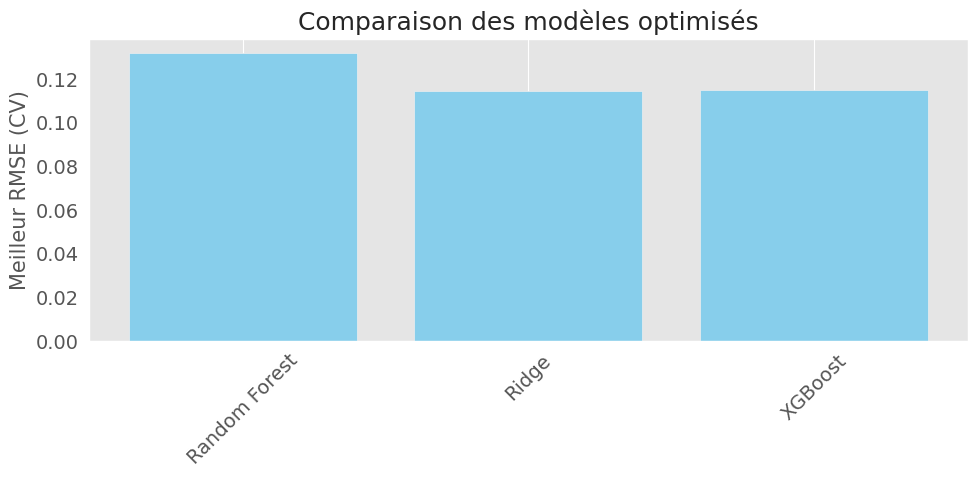

In [38]:
print("\n--- D√©marrage de l'optimisation des hyperparam√®tres avec Optuna ---")

model_configs = {
    'Random Forest': random_forest_objective,
    'Ridge': ridge_objective,
    'XGBoost': xgBoost_objective
}

results = optimize_models(model_configs, X_train, y_train, preprocessing_pipeline, n_trials=100)

random_forest_best_params = results['Random Forest'][1]
ridge_best_params = results['Ridge'][1]
xgboost_best_params = results['XGBoost'][1]

random_forest_study = results['Random Forest'][2]
ridge_study = results['Ridge'][2]
xgboost_study = results['XGBoost'][2]


Afin de garder une trace des meilleurs hyper-param√®tres, nous allons logg√© nos meilleurs mod√®les dans MLFlow

In [40]:
# Lancement du server local MLflow pour le suivi des exp√©riences
# mlflow server --host 127.0.0.1 --port 5000

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("House_Prices_Predictions")

for model_name, (best_score, best_params, study) in results.items():
    with mlflow.start_run(run_name=f"{model_name}_Optuna_Best"):
        mlflow.log_params(best_params)
        mlflow.log_metric("rmse", best_score)
        mlflow.set_tag("model_name", model_name)

üèÉ View run Random Forest_Optuna_Best at: http://localhost:5000/#/experiments/437354363026289280/runs/982f88e0672f47e49798afe728a48f8e
üß™ View experiment at: http://localhost:5000/#/experiments/437354363026289280
üèÉ View run Ridge_Optuna_Best at: http://localhost:5000/#/experiments/437354363026289280/runs/fff6e695640748e6812c0ac6d0d6a14c
üß™ View experiment at: http://localhost:5000/#/experiments/437354363026289280
üèÉ View run XGBoost_Optuna_Best at: http://localhost:5000/#/experiments/437354363026289280/runs/6ad6083657954d2d99d27e17c9af5176
üß™ View experiment at: http://localhost:5000/#/experiments/437354363026289280


In [41]:
#Extraction du meilleur mod√®le
best_params = results['Random Forest'][1]
best_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_model.fit(preprocessing_pipeline.fit_transform(X_train), y_train)
joblib.dump(best_model, "best_random_forest_model.pkl")
print("Mod√®le sauvegard√© sous 'best_random_forest.pkl'")

best_params = results['Ridge'][1]
best_model = Ridge(**best_params, random_state=42)
best_model.fit(preprocessing_pipeline.fit_transform(X_train), y_train)
joblib.dump(best_model, "best_Ridge_model.pkl")
print("Mod√®le sauvegard√© sous 'best_Ridge_model.pkl'")

best_params = results['XGBoost'][1]
best_model = xgb.XGBRegressor(**best_params, objective="reg:squarederror", random_state=42, n_jobs=-1)
best_model.fit(preprocessing_pipeline.fit_transform(X_train), y_train)
joblib.dump(best_model, "best_XGBoost_model.pkl")
print("Mod√®le sauvegard√© sous 'best_XGBoost_model.pkl'")

Mod√®le sauvegard√© sous 'best_random_forest.pkl'
Mod√®le sauvegard√© sous 'best_Ridge_model.pkl'
Mod√®le sauvegard√© sous 'best_XGBoost_model.pkl'


## 3. Phase d'√©valuation

Une fois nos mod√®les entrain√©s, il nous faut les √©valuer et les comparer avec notre mod√®le baseline ainsi qu'avec nos contraintes m√©tiers. Pour ce faire, nous allons utiliser SHAP pour voir quelles sont les 20 variables ayant le plus d'impact sur le prix de ventes. Gr√¢ce √† ces informations nous pourrons d√©cider quel mod√®le nous souhaitons impl√©menter. Avant cela, nous allons comparer les scores RMSE de tous nos mod√®les par rapport √† la baseline afin d'√©carter le mod√®le le plus mauvais.

In [42]:
results_table = pd.DataFrame({
    "Model": ["Baseline", "Random Forest", "Ridge", "XGBoost"],
    "RMSE": [
        baseline_RMSE,
        results['Random Forest'][0],
        results['Ridge'][0],
        results['XGBoost'][0]
    ],
    "Gain vs Baseline": [
        0,
        baseline_RMSE - results['Random Forest'][0],
        baseline_RMSE - results['Ridge'][0],
        baseline_RMSE - results['XGBoost'][0]
    ]
})

# Display with nice formatting
results_table.style.format({"RMSE": "{:.4f}", "Gain vs Baseline": "{:+.4f}"}).set_caption("Comparaison des mod√®les (RMSE)")

Nous voyons donc que le mod√®le Ridge et XGBoost engendrent le plus de gain vis-√†-vis de notre baseline. Nous allons donc √©carter le Random Forest car le gain par rapport √† la baseline n'est pas suffisant pour justifier l'int√©gration de l'outil. Cependant la regression de Ridge ainsi que le XGBoost ont un score plus que satisfaisant et sont donc int√©ressants.  

Nous allons maintenant proc√©der √† l'analyse SHAP.

Valeurs SHAP pour le Random Forest


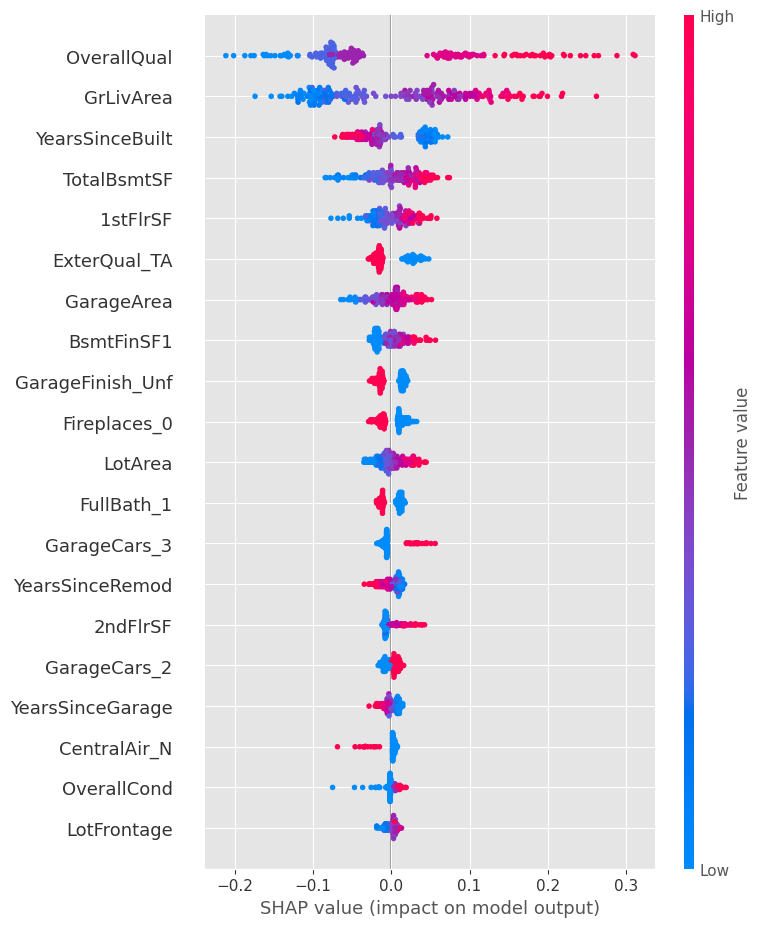

  0%|          | 0/200 [00:00<?, ?it/s]

Valeurs SHAP pour le Ridge


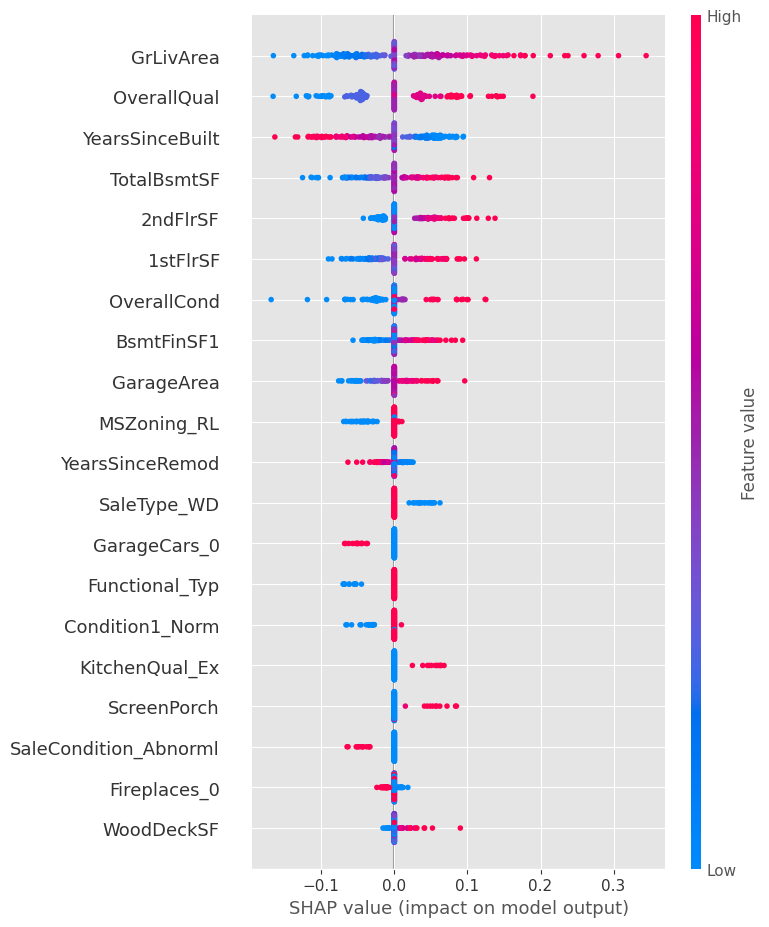

Valeurs SHAP pour le XGBoost


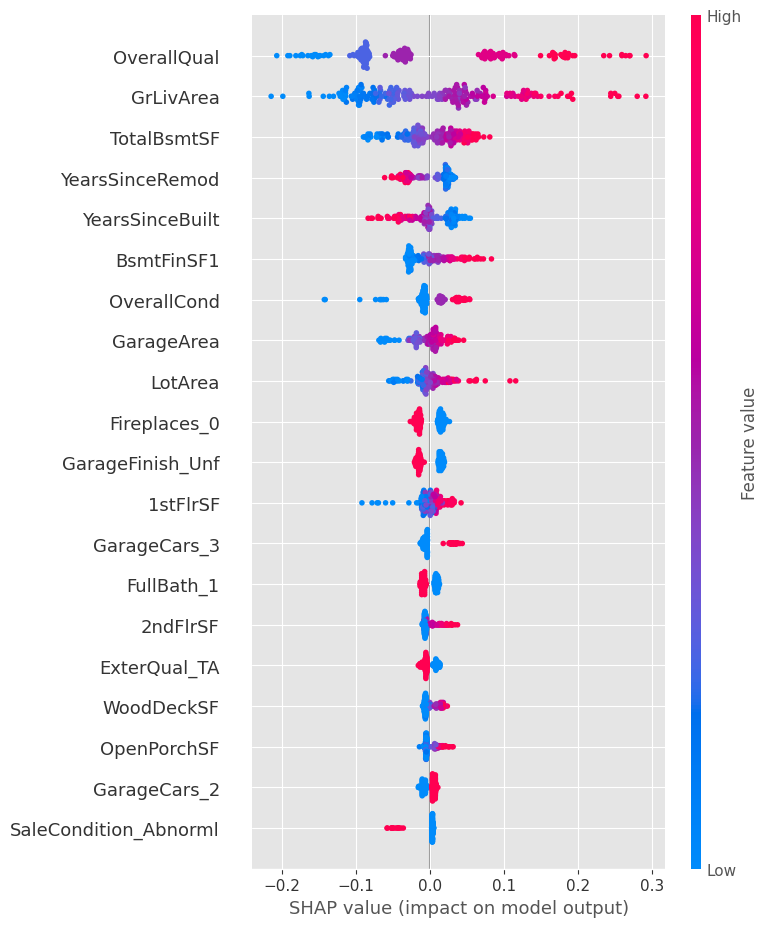

In [43]:
preprocessing_pipeline.fit(X_train)

X_sample = preprocessing_pipeline.transform(X.iloc[:200])

num_features = quantitative
cat_features = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(qualitative)
date_features = ['YearsSinceBuilt', 'YearsSinceRemod', 'YearsSinceGarage']

all_features = list(num_features) + list(cat_features) + list(date_features)

best_rf = joblib.load("best_random_forest_model.pkl")
best_xgboost = joblib.load("best_XGBoost_model.pkl")
best_ridge = joblib.load("best_Ridge_model.pkl")

explainer = shap.TreeExplainer(best_rf)
shap_values_rf = explainer.shap_values(X_sample)
print("Valeurs SHAP pour le Random Forest")
shap.summary_plot(shap_values_rf, X_sample, feature_names=all_features)

background = X_sample[:50]
explainer = shap.KernelExplainer(best_ridge.predict, background)
shap_values_ridge = explainer.shap_values(X_sample)
print("Valeurs SHAP pour le Ridge")
shap.summary_plot(shap_values_ridge, X_sample, feature_names=all_features)

explainer = shap.TreeExplainer(best_xgboost)
shap_values_xgb = explainer.shap_values(X_sample)
print("Valeurs SHAP pour le XGBoost")
shap.summary_plot(shap_values_xgb, X_sample, feature_names=all_features)


Gr√¢ce √† l'analsye SHAP, nous pouvons voir quelles variables ont les plus d'impact sur le prix de vente en fonction des mod√®les. Nous avons √©cart√© le Random Forest plus t√¥t et nous allons donc nous concenter sur le Ridge et le XGBoost. 

In [44]:
# Moyenne absolue des valeurs SHAP pour chaque feature
mean_abs_shap_ridge = np.abs(shap_values_ridge).mean(axis=0)
mean_abs_shap_xgb = np.abs(shap_values_xgb).mean(axis=0)

# Top 10 features pour chaque mod√®le
top10_ridge = pd.Series(mean_abs_shap_ridge, index=all_features).sort_values(ascending=False).head(10)
top10_xgb = pd.Series(mean_abs_shap_xgb, index=all_features).sort_values(ascending=False).head(10)

# Fusionner dans un tableau comparatif
comparatif = pd.DataFrame({
    "Ridge (importance)": top10_ridge,
    "XGBoost (importance)": top10_xgb
}).fillna("")

comparatif

Ridge (importance) XGBoost (importance)
1stFlrSF                  0.023318                     
2ndFlrSF                  0.023683                     
BsmtFinSF1                0.015068             0.022077
Fireplaces_0                                   0.015721
GarageArea                0.013024             0.016646
GrLivArea                 0.062904             0.081481
LotArea                                        0.016007
MSZoning_RL               0.009247                     
OverallCond                0.01752             0.019037
OverallQual               0.046909             0.101645
TotalBsmtSF                0.02744             0.033751
YearsSinceBuilt           0.044072             0.023799
YearsSinceRemod                                0.025448

### Crit√®res de choix entre Ridge et XGBoost √† partir de l'analyse SHAP

- **Coh√©rence avec l‚Äôexpertise m√©tier**¬†: Dans les deux cas, les variables principales sont fortement li√©es √† notre cas m√©tier et sont facilement comprises et adopt√©es par le m√©tier. En effet, les variables choisies pour notre baseline se retrouvent ici.
- **Simplicit√© et explicabilit√©**¬†: Le mod√®le Ridge est bas√©e sur une r√©gression lin√©aire, il est donc plus simple √† mettre en place et plus facile √† expliquer et √† auditer. Nous constatons que les performances sont assez proches (Score RMSE quasiement √©gaux). Il pourrait √™tre pr√©f√©rable de s√©l√©ctionner le Ridge vis-√†-vis du XGBoost.
- **Capacit√© √† capturer des relations complexes**¬†: XGBoost peut mod√©liser des interactions non lin√©aires et des effets crois√©s entre variables. Cependannt, nous ne constatons pas de diff√©rences majeures de performance entre les deux mod√®les. Par cons√©quent, il est difficile de justifier l'utilisation d'un mod√®le plus complexe.

**En r√©sum√©¬†:**
Nous allons donc privil√©gier l'utilisation de la regression de Ridge car le mod√®le est plus simple pour des performances similaires.

## 4. Phase de D√©ploiement : Entra√Ænement final et Pr√©diction

In [49]:
def evaluate_final_cv(model_name, model_class, best_params, preprocessing_pipeline, X, y, cv=10, scoring='neg_root_mean_squared_error'):
    model = model_class(**best_params, random_state=42)

    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    mean_rmse = -scores.mean()
    std_rmse = scores.std()

    print(f"\n√âvaluation finale (cv 10) pour {model_name} :")
    print(f"RMSE moyen : {mean_rmse:.5f}")
    print(f"√âcart-type : {std_rmse:.5f}")
    print("------------------------------------")
    
    return mean_rmse, std_rmse, -scores

evaluate_final_cv("Random Forest", RandomForestRegressor, random_forest_best_params, preprocessing_pipeline, X_train, y_train)
evaluate_final_cv("Ridge", Ridge, ridge_best_params, preprocessing_pipeline, X_train, y_train)
evaluate_final_cv("XGBoost", xgb.XGBRegressor, xgboost_best_params, preprocessing_pipeline, X_train, y_train)


√âvaluation finale (cv 10) pour Random Forest :
RMSE moyen : 0.13041
√âcart-type : 0.01360
------------------------------------

√âvaluation finale (cv 10) pour Ridge :
RMSE moyen : 0.11156
√âcart-type : 0.01437
------------------------------------

√âvaluation finale (cv 10) pour XGBoost :
RMSE moyen : 0.11396
√âcart-type : 0.01536
------------------------------------


(np.float64(0.11396399800139101),
 np.float64(0.01535561842292534),
 array([0.11534585, 0.09522084, 0.10470813, 0.13306847, 0.13941818,
        0.10504741, 0.1232967 , 0.09677818, 0.09848645, 0.12826978]))

In [50]:
print("\n--- Entra√Ænement du mod√®le final Ridge sur l'ensemble des donn√©es d'entra√Ænement ---")

# Utiliser les meilleurs hyperparam√®tres trouv√©s pour Ridge
final_model = Ridge(**ridge_best_params, random_state=42)
final_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('model', final_model)
])
final_pipeline.fit(X_train, y_train)
print("Entra√Ænement termin√©.")

log_predictions = final_pipeline.predict(X_test)

final_predictions = np.expm1(log_predictions)


submission = pd.DataFrame({'Id': test_df.index, 'SalePrice': final_predictions})
submission.to_csv('submission_optimized_ridge.csv', index=False)

print("\nFichier 'submission_optimized_ridge.csv' g√©n√©r√© avec succ√®s.")
print("Aper√ßu des pr√©dictions :")
print(submission.head())

# Sauvegarder le pipeline complet pour une utilisation future
import joblib
joblib.dump(final_pipeline, "final_ridge_pipeline.pkl")
print("Pipeline Ridge sauvegard√© sous 'final_ridge_pipeline.pkl'")


--- Entra√Ænement du mod√®le final Ridge sur l'ensemble des donn√©es d'entra√Ænement ---
Entra√Ænement termin√©.

Fichier 'submission_optimized_ridge.csv' g√©n√©r√© avec succ√®s.
Aper√ßu des pr√©dictions :
     Id      SalePrice
0  1461  119045.090918
1  1462  157091.690101
2  1463  181836.840513
3  1464  200968.174847
4  1465  191717.783076
Pipeline Ridge sauvegard√© sous 'final_ridge_pipeline.pkl'


Nous loggons par cons√©quent le mod√®le final vers MLFlow dans une autre "experiment" afin de garder une trace du mod√®le de production

In [51]:
import mlflow.data


final_pipeline = joblib.load("final_ridge_pipeline.pkl")

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("House_Prices_Predictions_Production")

input_example = train_df.head(5)
signature = infer_signature(train_df, final_pipeline.predict(train_df))

with mlflow.start_run(run_name="Ridge_Final_Model"):
    mlflow.log_params(ridge_best_params)
    mlflow.sklearn.log_model(
        final_pipeline,
        name="model",
        input_example=input_example,
        signature=signature
    )

    mlflow.set_tag("model_name", "final_ridge_pipeline")
    input_dataset = mlflow.data.from_pandas(train_df, source="train.csv")
    mlflow.log_input(input_dataset, context="training")
    print("Pipeline Ridge logg√© dans MLflow avec succ√®s.")

Pipeline Ridge logg√© dans MLflow avec succ√®s.
üèÉ View run Ridge_Final_Model at: http://localhost:5000/#/experiments/472951656940009004/runs/540b30ce35294815823cb0e289a72231
üß™ View experiment at: http://localhost:5000/#/experiments/472951656940009004


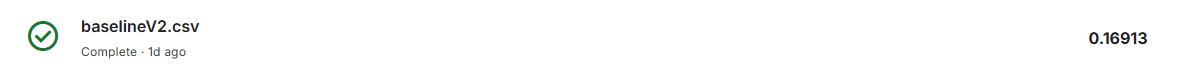

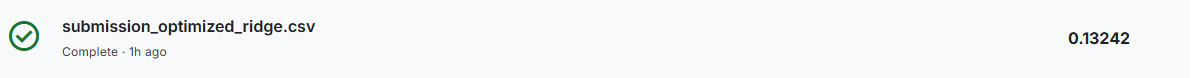

Nous avons donc export√© le mod√©le entrain√© sur notre dataset, nous allons le d√©ployer sur MLFlow afin de pouvoir l'interroger via une API REST. Un serveur MLFlow sera alors mis en place dans nos locaux et une petite applicaton web permettra d'interroger le mod√®le.

Les donn√©es seront alors renseign√©es dans un formulaire par le client et soumises au mod√®le. Une fois le prix de vente pr√©dit, nos collaborateurs utiliseront cette informations afin de d√©finir si le prix de ventes d√©fini par le vendeur ne d√©passe pas d'au maximum 5% le prix de vente pr√©dits. 

Cet outil nous permettra donc d'√©carter plus facilement les pr√™ts √† "risques" car nous aurons une assurance que la valeur du bien immobilier correspond au prix de vente.

Nous n'avons pas besoin que le mod√®le soit r√©entrain√© de mani√®re continue ni qu'il soit disponible 24/24 7/7. Nous allons donc le r√©entrainer chaque ann√©e lors de la r√©vision des taux hypoth√©caires et nous pourrons d√©ployer le nouveau mod√®le hors des heures de bureau. Nous utiliserons les donn√©es de l'ann√©e pr√©c√©dente (les m√™mes que celles utilis√©es pour calculer les taux hypoth√©caires).

Afin de v√©rifier que le mod√®le reste en ad√©quation avec la r√©alit√©, une fois par mois, nous contr√¥lerons les r√©sultats fournis par le mod√®le sur des ventes effectu√©es. Nous accepterons un √©cart maximal 5% entre la pr√©diction et la r√©alit√© de la vente. De plus, nous mettrons en place un syst√®me d'audits g√©r√© par un organe de r√©vision externe afin de s'assurer de l'impartialit√© du mod√®le.

## Cadre juridique et √©thique appliqu√© au projet Banklytics

### R√©f√©rentiels r√©glementaires mobilis√©s
Bien que le projet soit ancr√© dans un contexte nord-am√©ricain, sa conception s‚Äôappuie volontairement sur les r√©f√©rentiels europ√©ens, en particulier le R√®glement sur l‚Äôintelligence artificielle (AI Act) et le R√®glement g√©n√©ral sur la protection des donn√©es (RGPD). Cette approche permet d‚Äôanticiper les exigences internationales en mati√®re de gouvernance algorithmique et de garantir un haut niveau de conformit√©, notamment en cas d‚Äôextension du mod√®le √† d‚Äôautres juridictions.

### Gouvernance des donn√©es
Les donn√©es utilis√©es sont extraites d‚Äôanciens dossiers techniques de pr√™ts hypoth√©caires, comprenant uniquement des caract√©ristiques factuelles des biens immobiliers (surface, nombre de pi√®ces, ann√©e de construction, qualit√© g√©n√©rale, etc.). Aucune information personnelle ou sensible concernant les emprunteurs n‚Äôest incluse. L‚Äôensemble du jeu de donn√©es est anonymis√©, consolid√© et nettoy√©, conform√©ment aux principes du RGPD, afin de garantir la protection des donn√©es et la qualit√© statistique du mod√®le.

### Pr√©vention des biais et √©quit√©
Certaines variables, telles que la localisation (quartier), sont identifi√©es comme potentiellement sensibles en raison de leur corr√©lation possible avec des in√©galit√©s socio-√©conomiques. Des analyses exploratoires ont permis de surveiller ces variables et d‚Äôanticiper d‚Äô√©ventuels biais indirects. Un m√©canisme de monitoring post-d√©ploiement est pr√©vu afin de d√©tecter toute d√©rive ou discrimination syst√©matique sur des segments sp√©cifiques (zones g√©ographiques, types de biens).

### Explicabilit√© et supervision humaine
Le mod√®le est con√ßu pour fonctionner comme un outil d‚Äôaide √† la d√©cision, sans automatiser l‚Äôacceptation ou le refus d‚Äôun cr√©dit. Chaque estimation est accompagn√©e d‚Äôune visualisation des facteurs explicatifs, gr√¢ce √† l‚Äôoutil SHAP, permettant √† l‚Äôanalyste de comprendre les variables ayant influenc√© la pr√©diction. Ce principe d‚Äôexplicabilit√© r√©pond aux exigences de l‚Äôarticle 13 du RGPD et aux recommandations de l‚Äôarticle 14 de l‚ÄôAI Act sur la supervision humaine des syst√®mes √† haut risque.

### Auditabilit√© et cycle de vie du mod√®le
Conform√©ment aux articles 9 √† 15 de l‚ÄôAI Act, le mod√®le fait l‚Äôobjet d‚Äôune documentation rigoureuse, incluant la version des jeux de donn√©es, les hyperparam√®tres d‚Äôapprentissage, les performances historiques (RMSLE), ainsi que les r√©sultats des tests de robustesse. Un retraining trimestriel est pr√©vu avec les nouvelles donn√©es valid√©es, accompagn√© d‚Äôun suivi mensuel des performances pour d√©tecter d‚Äô√©ventuelles d√©rives (concept drift).

## Conclusion

Ce notebook a appliqu√© une d√©marche robuste et moderne¬†:

1. Utilisation d'un pipeline Scikit-Learn pour un pr√©traitement propre et reproductible.
2. Optimisation automatis√©e des hyperparam√®tres avec Optuna pour maximiser la performance.
3. Entra√Ænement d'un mod√®le final performant et g√©n√©ration des pr√©dictions.
4. Analyse de l'importance des variables pour une meilleure explicabilit√© du mod√®le.

Le mod√®le est pr√™t √† √™tre int√©gr√© comme outil d'aide √† la d√©cision pour les analystes de¬†Banklytics.